In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
!unzip test1.zip


unzip:  cannot find or open test1.zip, test1.zip.zip or test1.zip.ZIP.


In [4]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras_preprocessing.image import ImageDataGenerator
import numpy as np



In [6]:
# 코랩 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/MLDL/study_mldl/glasses-noglasses/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/MLDL/study_mldl/glasses-noglasses/validate", target_size=(224,224))

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



In [11]:
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=2, activation='softmax'))



In [12]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('vgg16_1.h5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=1, generator=traindata, validation_data=testdata, validation_steps=1, epochs=50, callbacks=[checkpoint, early])


<ipython-input-14-60fa4c1a1cf3>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=1, generator=traindata, validation_data=testdata, validation_steps=1, epochs=50, callbacks=[checkpoint, early])


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.3438

1/1 [==============================] - 50s 50s/step - loss: 0.7106 - accuracy: 0.3438 - val_loss: 31115.1543 - val_accuracy: 0.5625
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 18131.7051 - accuracy: 0.7500

1/1 [==============================] - 3s 3s/step - loss: 18131.7051 - accuracy: 0.7500 - val_loss: 1.2766 - val_accuracy: 0.5312
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.2621 - accuracy: 0.5312

1/1 [==============================] - 1s 1s/step - loss: 1.2621 - accuracy: 0.5312 - val_loss: 0.7750 - val_accuracy: 0.4688
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.6250

1/1 [==============================] - 1s 735ms/step - loss: 0.6646 - accuracy: 0.6250 - val_loss: 0.7019 - val_accuracy: 0.5312
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.5000

1/1 [==============================] - 0s 419ms/step - loss: 0.7135 - accuracy: 0.5000 - val_loss: 2.1098 - val_accuracy: 0.4375
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 2.1954 - accuracy: 0.4062

1/1 [==============================] - 1s 752ms/step - loss: 2.1954 - accuracy: 0.4062 - val_loss: 0.6887 - val_accuracy: 0.5312
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 0.7089 - accuracy: 0.3750

1/1 [==============================] - 0s 425ms/step - loss: 0.7089 - accuracy: 0.3750 - val_loss: 0.6981 - val_accuracy: 0.5312
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 0.6510 - accuracy: 0.6562

1/1 [==============================] - 1s 727ms/step - loss: 0.6510 - accuracy: 0.6562 - val_loss: 1.7416 - val_accuracy: 0.4375
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 1.7079 - accuracy: 0.4375

1/1 [==============================] - 1s 727ms/step - loss: 1.7079 - accuracy: 0.4375 - val_loss: 0.7132 - val_accuracy: 0.4062
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.5000

1/1 [==============================] - 1s 744ms/step - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.6562

1/1 [==============================] - 1s 730ms/step - loss: 0.6809 - accuracy: 0.6562 - val_loss: 1.6245 - val_accuracy: 0.5312
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 1.7315 - accuracy: 0.5000

1/1 [==============================] - 1s 748ms/step - loss: 1.7315 - accuracy: 0.5000 - val_loss: 0.9675 - val_accuracy: 0.4375
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 0.7959 - accuracy: 0.5625

1/1 [==============================] - 1s 728ms/step - loss: 0.7959 - accuracy: 0.5625 - val_loss: 0.8415 - val_accuracy: 0.4688
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 0.7694 - accuracy: 0.5312

1/1 [==============================] - 1s 809ms/step - loss: 0.7694 - accuracy: 0.5312 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.5625

1/1 [==============================] - 1s 812ms/step - loss: 0.6830 - accuracy: 0.5625 - val_loss: 0.7004 - val_accuracy: 0.4688
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5625

1/1 [==============================] - 1s 901ms/step - loss: 0.6847 - accuracy: 0.5625 - val_loss: 0.6903 - val_accuracy: 0.5312
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.3750

1/1 [==============================] - 1s 583ms/step - loss: 0.7183 - accuracy: 0.3750 - val_loss: 0.6923 - val_accuracy: 0.4688
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5625

1/1 [==============================] - 1s 865ms/step - loss: 0.6850 - accuracy: 0.5625 - val_loss: 0.6837 - val_accuracy: 0.7812
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.7500

1/1 [==============================] - 1s 1s/step - loss: 0.6817 - accuracy: 0.7500 - val_loss: 0.7536 - val_accuracy: 0.5625
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 0.8233 - accuracy: 0.5000

1/1 [==============================] - 1s 845ms/step - loss: 0.8233 - accuracy: 0.5000 - val_loss: 0.7425 - val_accuracy: 0.5312
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 0.8524 - accuracy: 0.3750

1/1 [==============================] - 1s 541ms/step - loss: 0.8524 - accuracy: 0.3750 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.6250

1/1 [==============================] - 1s 588ms/step - loss: 0.6610 - accuracy: 0.6250 - val_loss: 0.9145 - val_accuracy: 0.4062
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 0.7869 - accuracy: 0.5312

1/1 [==============================] - 1s 964ms/step - loss: 0.7869 - accuracy: 0.5312 - val_loss: 0.7120 - val_accuracy: 0.4688
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.6581 - accuracy: 0.6562

1/1 [==============================] - 1s 803ms/step - loss: 0.6581 - accuracy: 0.6562 - val_loss: 0.7225 - val_accuracy: 0.4688
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.5938

1/1 [==============================] - 1s 848ms/step - loss: 0.6731 - accuracy: 0.5938 - val_loss: 0.7179 - val_accuracy: 0.5000
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.7893 - accuracy: 0.3438

1/1 [==============================] - 1s 795ms/step - loss: 0.7893 - accuracy: 0.3438 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.6250

1/1 [==============================] - 1s 784ms/step - loss: 0.6697 - accuracy: 0.6250 - val_loss: 0.6976 - val_accuracy: 0.4688
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.6250

1/1 [==============================] - 0s 498ms/step - loss: 0.6791 - accuracy: 0.6250 - val_loss: 0.6874 - val_accuracy: 0.5625
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.4688

1/1 [==============================] - 1s 787ms/step - loss: 0.6963 - accuracy: 0.4688 - val_loss: 0.6881 - val_accuracy: 0.5625
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.5938

1/1 [==============================] - 1s 779ms/step - loss: 0.6864 - accuracy: 0.5938 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5625

1/1 [==============================] - 1s 772ms/step - loss: 0.6871 - accuracy: 0.5625 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5625

1/1 [==============================] - 1s 830ms/step - loss: 0.6868 - accuracy: 0.5625 - val_loss: 0.6950 - val_accuracy: 0.4688
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.4688

1/1 [==============================] - 1s 910ms/step - loss: 0.6947 - accuracy: 0.4688 - val_loss: 0.6914 - val_accuracy: 0.4062
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.6250

1/1 [==============================] - 1s 591ms/step - loss: 0.6847 - accuracy: 0.6250 - val_loss: 0.6958 - val_accuracy: 0.4688
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 0.7119 - accuracy: 0.3750

1/1 [==============================] - 1s 717ms/step - loss: 0.7119 - accuracy: 0.3750 - val_loss: 0.6923 - val_accuracy: 0.4062
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7500

1/1 [==============================] - 1s 546ms/step - loss: 0.6791 - accuracy: 0.7500 - val_loss: 0.6952 - val_accuracy: 0.4688
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.4062

1/1 [==============================] - 1s 883ms/step - loss: 0.7003 - accuracy: 0.4062 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.7025 - accuracy: 0.3750

1/1 [==============================] - 1s 795ms/step - loss: 0.7025 - accuracy: 0.3750 - val_loss: 0.6864 - val_accuracy: 0.5312
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.8125

1/1 [==============================] - 1s 813ms/step - loss: 0.6834 - accuracy: 0.8125 - val_loss: 0.6794 - val_accuracy: 0.5625
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.7500

1/1 [==============================] - 1s 765ms/step - loss: 0.6813 - accuracy: 0.7500 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.5938

1/1 [==============================] - 1s 823ms/step - loss: 0.6728 - accuracy: 0.5938 - val_loss: 0.6524 - val_accuracy: 0.5625
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 0.6663 - accuracy: 0.5312

1/1 [==============================] - 1s 856ms/step - loss: 0.6663 - accuracy: 0.5312 - val_loss: 0.6460 - val_accuracy: 0.7500
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.6212 - accuracy: 0.7812

1/1 [==============================] - 1s 780ms/step - loss: 0.6212 - accuracy: 0.7812 - val_loss: 1.2344 - val_accuracy: 0.5000
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 1.3329 - accuracy: 0.5000

1/1 [==============================] - 1s 875ms/step - loss: 1.3329 - accuracy: 0.5000 - val_loss: 0.6629 - val_accuracy: 0.5000
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.6529 - accuracy: 0.5312

1/1 [==============================] - 1s 771ms/step - loss: 0.6529 - accuracy: 0.5312 - val_loss: 0.6713 - val_accuracy: 0.5625
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.6602 - accuracy: 0.5938

1/1 [==============================] - 1s 761ms/step - loss: 0.6602 - accuracy: 0.5938 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.4688

1/1 [==============================] - 1s 766ms/step - loss: 0.6923 - accuracy: 0.4688 - val_loss: 0.6842 - val_accuracy: 0.5312
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.6695 - accuracy: 0.5938

1/1 [==============================] - 1s 787ms/step - loss: 0.6695 - accuracy: 0.5938 - val_loss: 0.7043 - val_accuracy: 0.4688
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.6250

1/1 [==============================] - 1s 527ms/step - loss: 0.6470 - accuracy: 0.6250 - val_loss: 0.7527 - val_accuracy: 0.5000
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.8266 - accuracy: 0.3750

1/1 [==============================] - 0s 443ms/step - loss: 0.8266 - accuracy: 0.3750 - val_loss: 0.6912 - val_accuracy: 0.4688


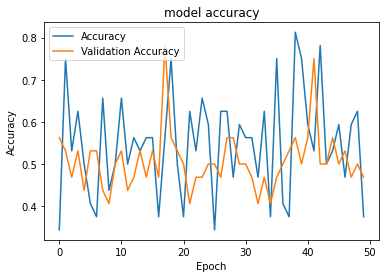

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()



In [16]:
model.save('vgg16_1.h5')


1/1 [==============================] - 1s 814ms/step
no-glasses


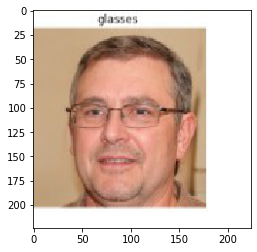

In [20]:

from tensorflow.keras.utils import load_img
img = load_img("/content/drive/MyDrive/MLDL/study_mldl/glasses-noglasses/test/row-1-column-9.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')